# Show Sinosoidal Wave

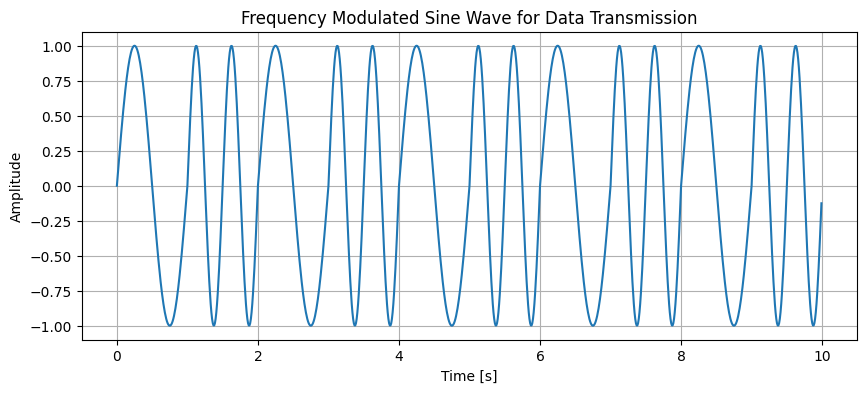

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_modulated_sine(data, sample_rate=100, duration=1):
    """
    Generate a sine wave with modulated frequency based on input data.

    Args:
    data (str): A string of binary data ('0' and '1').
    sample_rate (int): Number of samples per second.
    duration (int): Duration of each bit in seconds.

    Returns:
    numpy.array: Time values for the x-axis.
    numpy.array: Amplitude values for the y-axis.
    """
    frequencies = {'0': 1, '1': 2}  # Frequency for '0' and '1'
    t_total = np.array([])
    y_total = np.array([])
    
    # Generate the sine wave for each bit
    for bit in data:
        t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
        y = np.sin(2 * np.pi * frequencies[bit] * t)
        t_total = np.concatenate((t_total, t + (len(t_total) / sample_rate)))
        y_total = np.concatenate((y_total, y))

    return t_total, y_total

# Data to be transmitted
data = '0101010101'  # Example data

# Generate and plot the modulated sine wave
t, y = generate_modulated_sine(data)
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Frequency Modulated Sine Wave for Data Transmission')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Now generate a packet.

In [10]:
import scapy
from scapy.all import IP, Ether

# Create an IP packet
ip_packet = Ether() / IP(src="127.0.0.1", dst="127.0.0.1")

# Print the packet summary
print(ip_packet.summary())

send(ip_packet)


Ether / 127.0.0.1 > 127.0.0.1 ip

Sent 1 packets.


Set frequencies to 1hz and 2 hz representing 0' and 1's respectively.

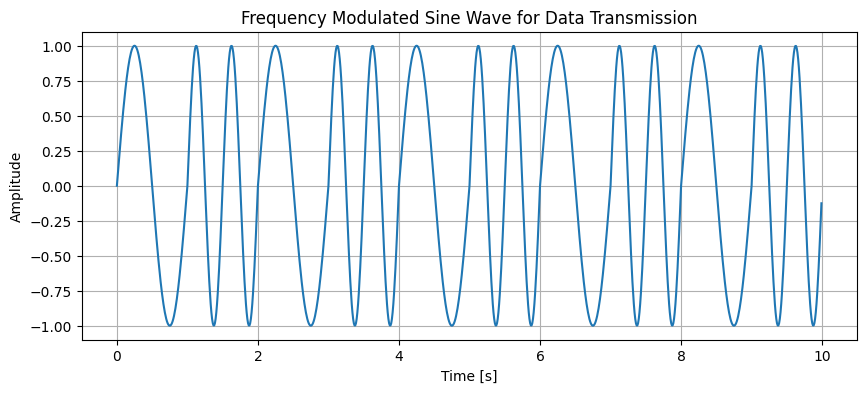

In [10]:

def generate_modulated_sine(data, sample_rate=100, duration=1):
    """
    Generate a sine wave with modulated frequency based on input data.

    Args:
    data (str): A string of binary data ('0' and '1').
    sample_rate (int): Number of samples per second.
    duration (int): Duration of each bit in seconds.

    Returns:
    numpy.array: Time values for the x-axis.
    numpy.array: Amplitude values for the y-axis.
    """
    frequencies = {'0': 1, '1': 2}  # Frequency for '0' and '1'
    t_total = np.array([])
    y_total = np.array([])
    
    # Generate the sine wave for each bit
    for bit in data:
        t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
        y = np.sin(2 * np.pi * frequencies[bit] * t)
        t_total = np.concatenate((t_total, t + (len(t_total) / sample_rate)))
        y_total = np.concatenate((y_total, y))

    return t_total, y_total

# Data to be transmitted
data = '0101010101'  # Example data

# Generate and plot the modulated sine wave
t, y = generate_modulated_sine(data)
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Frequency Modulated Sine Wave for Data Transmission')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Raw IP Packets generated to match above test wave.

In [17]:
from scapy.all import IP, ICMP, send
import time

def send_packets(data, sample_rate=100, duration=1):
    """
    Send packets based on modulated sine wave frequencies.
    
    Args:
    data (str): Binary data to transmit.
    sample_rate (int): Samples per second, defines resolution of sine wave.
    duration (int): Duration each bit is transmitted.
    """
    frequencies = {'0': 1, '1': 2}  # Frequency for '0' and '1'
    for bit in data:
        interval = 1.0 / frequencies[bit]  # Interval between packets
        print(f"Sending packets every {interval:.2f} seconds for '{bit}'")
        # Simulate packet sending for the duration of one bit
        start_time = time.time()
        while time.time() - start_time < duration:
            # Uncomment below to actually send a packet
            send(Ether() / IP(src="127.0.0.1", dst="127.0.0.1"), verbose=False)
            print(f"Packet sent at {time.time()}")
            time.sleep(interval)  # Sleep to maintain the frequency timing

# Example usage:
send_packets('0101')

Sending packets every 1.00 seconds for '0'
Packet sent at 1714574118.0298684
Sending packets every 0.50 seconds for '1'
Packet sent at 1714574119.0321233
Packet sent at 1714574119.534279
Sending packets every 1.00 seconds for '0'
Packet sent at 1714574120.0361726
Sending packets every 0.50 seconds for '1'
Packet sent at 1714574121.0396879
Packet sent at 1714574121.5417511


## Using ICMP to create the Sine Waves


In [37]:
from scapy.all import IP, ICMP, send
import time

def send_packets(target_ip, data, sample_rate=100, duration=1):
    """
    Send packets based on modulated sine wave frequencies to a target IP.

    Args:
    target_ip (str): IP address of the target to send packets.
    data (str): Binary data to transmit.
    sample_rate (int): Samples per second, defines resolution of sine wave.
    duration (int): Duration each bit is transmitted.
    """
    frequencies = {'0': 1, '1': 2}  # Frequency for '0' and '1'
    for bit in data:
        interval = 1.0 / frequencies[bit]  # Interval between packets
        print(f"Sending packets every {interval:.2f} seconds for '{bit}' at {target_ip}")
        # Simulate packet sending for the duration of one bit
        start_time = time.time()
        while time.time() - start_time < duration:
            send(IP(dst=target_ip)/ICMP(), verbose=False)
            time.sleep(interval)  # Sleep to maintain the frequency timing

# Example usage:
target_ip = "127.0.0.1"  # Adjust as necessary
send_packets(target_ip, '0101010101')

Sending packets every 1.00 seconds for '0' at 127.0.0.1
Sending packets every 0.50 seconds for '1' at 127.0.0.1
Sending packets every 1.00 seconds for '0' at 127.0.0.1
Sending packets every 0.50 seconds for '1' at 127.0.0.1
Sending packets every 1.00 seconds for '0' at 127.0.0.1
Sending packets every 0.50 seconds for '1' at 127.0.0.1
Sending packets every 1.00 seconds for '0' at 127.0.0.1
Sending packets every 0.50 seconds for '1' at 127.0.0.1
Sending packets every 1.00 seconds for '0' at 127.0.0.1
Sending packets every 0.50 seconds for '1' at 127.0.0.1


# Raw UDP Packets generated to match above test wave to port 666

In [2]:
from scapy.all import IP, UDP, send
import time

def send_packets(target_ip, data, sample_rate=100, duration=1, target_port=666):
    """
    Send UDP packets based on modulated sine wave frequencies to a target IP.

    Args:
    target_ip (str): IP address of the target to send packets.
    data (str): Binary data to transmit.
    sample_rate (int): Samples per second, defines resolution of sine wave.
    duration (int): Duration each bit is transmitted.
    target_port (int): Target port number for UDP packets.
    """
    frequencies = {'0': 1, '1': 2}  # Frequency for '0' and '1'
    for bit in data:
        interval = 1.0 / frequencies[bit]  # Interval between packets
        print(f"Sending UDP packets every {interval:.2f} seconds for '{bit}' to {target_ip}:{target_port}")
        start_time = time.time()
        while time.time() - start_time < duration:
            send(IP(dst=target_ip)/UDP(dport=target_port), verbose=False)
            time.sleep(interval)  # Sleep to maintain the frequency timing

# Example usage:
target_ip = "192.168.1.1"  # Adjust as necessary
send_packets(target_ip, '0101111000')

Sending UDP packets every 1.00 seconds for '0' to 192.168.1.1:666


Sending UDP packets every 0.50 seconds for '1' to 192.168.1.1:666


Sending UDP packets every 1.00 seconds for '0' to 192.168.1.1:666


Sending UDP packets every 0.50 seconds for '1' to 192.168.1.1:666


Sending UDP packets every 0.50 seconds for '1' to 192.168.1.1:666


Sending UDP packets every 0.50 seconds for '1' to 192.168.1.1:666


Sending UDP packets every 0.50 seconds for '1' to 192.168.1.1:666


Sending UDP packets every 1.00 seconds for '0' to 192.168.1.1:666


Sending UDP packets every 1.00 seconds for '0' to 192.168.1.1:666


Sending UDP packets every 1.00 seconds for '0' to 192.168.1.1:666
